🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

🔹 Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

🔹 Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.2

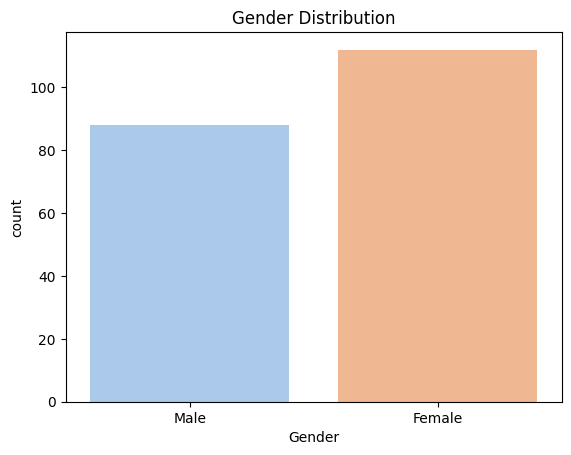

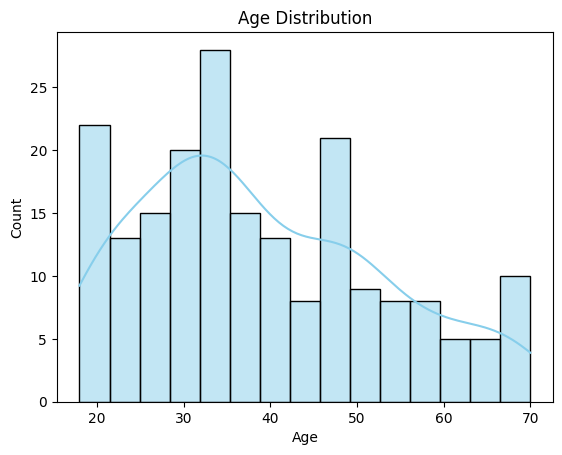

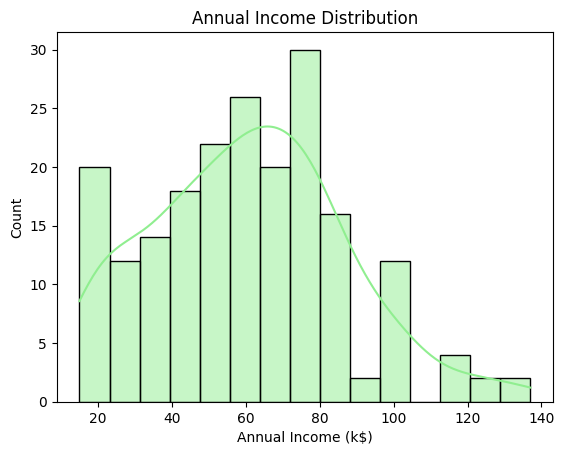

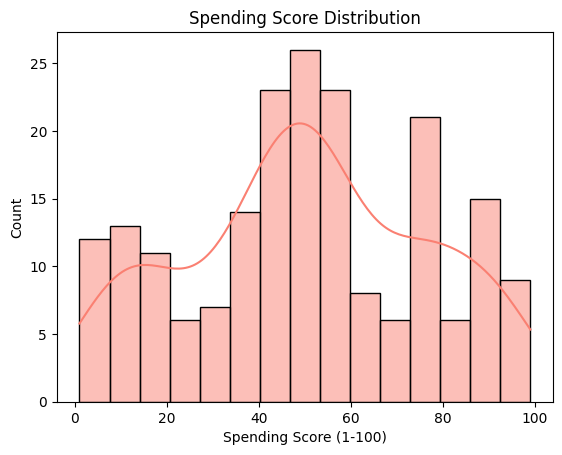

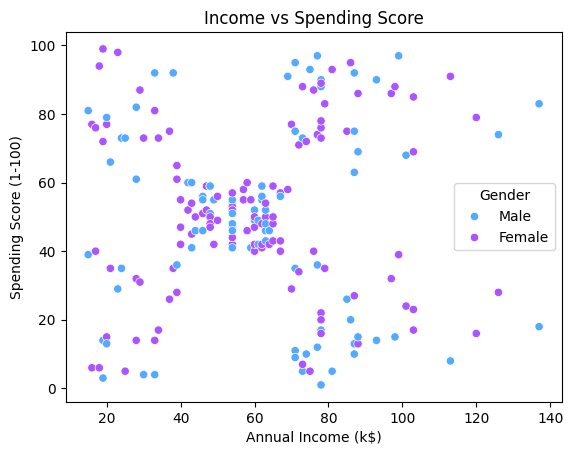

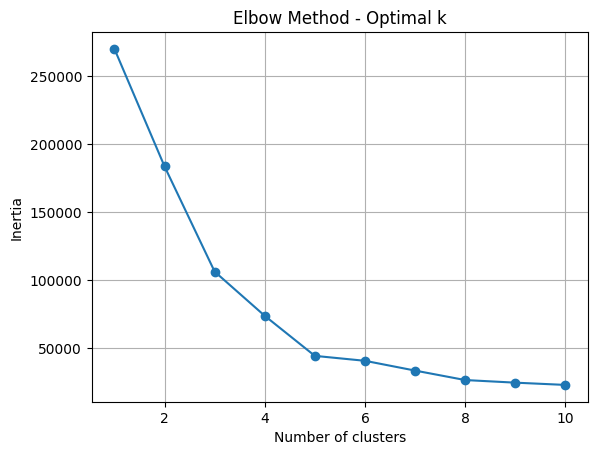

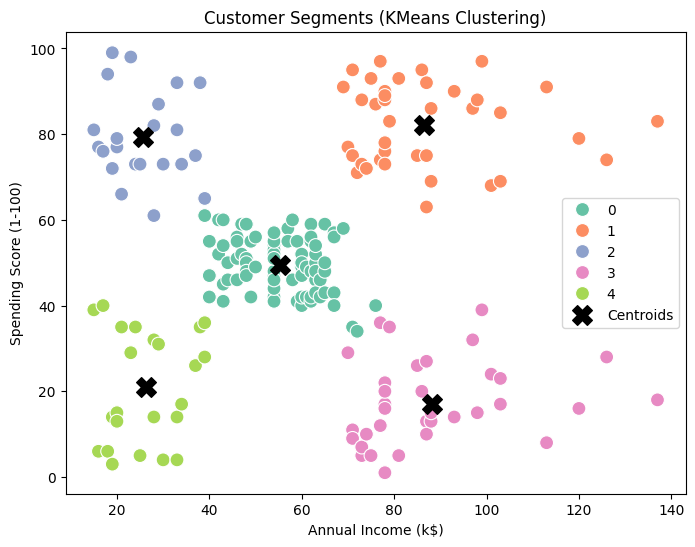

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

print("🔹 Dataset Info:")
print(df.info())
print("\n🔹 Missing Values:")
print(df.isnull().sum())
print("\n🔹 Summary Statistics:")
print(df.describe())

sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title("Gender Distribution")
plt.show()

sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='lightgreen')
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='salmon')
plt.title("Spending Score Distribution")
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='cool')
plt.title("Income vs Spending Score")
plt.show()

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # only use relevant features

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title("Customer Segments (KMeans Clustering)")
plt.legend()
plt.show()

print(df.head())
